# Tesla (TSLA) Stock Price prediction using Facebook Prophet 

In [ ]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

## Importing all the necessary Libraries

In [ ]:
#Necessary libraries = Pandas, fbprophet and plotly

#pandas= data Manipulation and analysis
#fbprophet = Forecasting
#plotly= data visualization


In [10]:
import pandas as pd
import plotly.express as px
from fbprophet import Propher

In [11]:
 #Initializing Plotly
import plotly.io as pio

## Importing the Dataset & Exploring it

In [34]:
df = pd.read_csv('TSLA_2022.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,382.583344,400.356659,378.679993,399.926666,399.926666,103931400
1,2022-01-04,396.516663,402.666656,374.350006,383.196655,383.196655,100248300
2,2022-01-05,382.216675,390.113342,360.336670,362.706665,362.706665,80119800
3,2022-01-06,359.000000,362.666656,340.166656,354.899994,354.899994,90336600
4,2022-01-07,360.123322,360.309998,336.666656,342.320007,342.320007,84164700
...,...,...,...,...,...,...,...
255,2023-01-09,118.959999,123.519997,117.110001,119.769997,119.769997,190284000
256,2023-01-10,121.070000,122.760002,114.919998,118.849998,118.849998,167642500
257,2023-01-11,122.089996,125.949997,120.510002,123.220001,123.220001,183810800
258,2023-01-12,122.559998,124.129997,117.000000,123.559998,123.559998,169400900


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       260 non-null    object 
 1   Open       260 non-null    float64
 2   High       260 non-null    float64
 3   Low        260 non-null    float64
 4   Close      260 non-null    float64
 5   Adj Close  260 non-null    float64
 6   Volume     260 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.3+ KB


In [36]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,260.000000,260.000000,260.000000,260.000000,260.000000,2.600000e+02
mean,259.001013,265.350064,251.498526,258.035782,258.035782,9.039415e+07
std,63.005045,64.138514,61.582354,62.796900,62.796900,3.453882e+07
min,103.000000,111.750000,101.809998,108.099998,108.099998,4.186470e+07
25%,222.187504,226.648335,214.785839,221.615002,221.615002,6.702772e+07
50%,270.706680,275.958328,261.294999,268.201660,268.201660,8.354805e+07
75%,301.381661,308.887497,294.042496,301.819160,301.819160,9.949298e+07
max,396.516663,402.666656,378.679993,399.926666,399.926666,2.314028e+08


# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [37]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [38]:
px.area(df, x='Date', y='Close')

In [39]:
px.line(df, x='Date', y='Close')

In [40]:
px.area(df, x='Date', y='Volume')

This is the daily transactional volume of Tesla stocks

The hight transactional volume of Tesla on Dec 21, 2021 is because it joined S&P 500

In [42]:
px.bar(df, x='Date', y='Volume')

In [43]:
# Lets create a boxplot to analyse the price of tesla
px.box(df, y='Close')

# Understanding Facebook Prophet

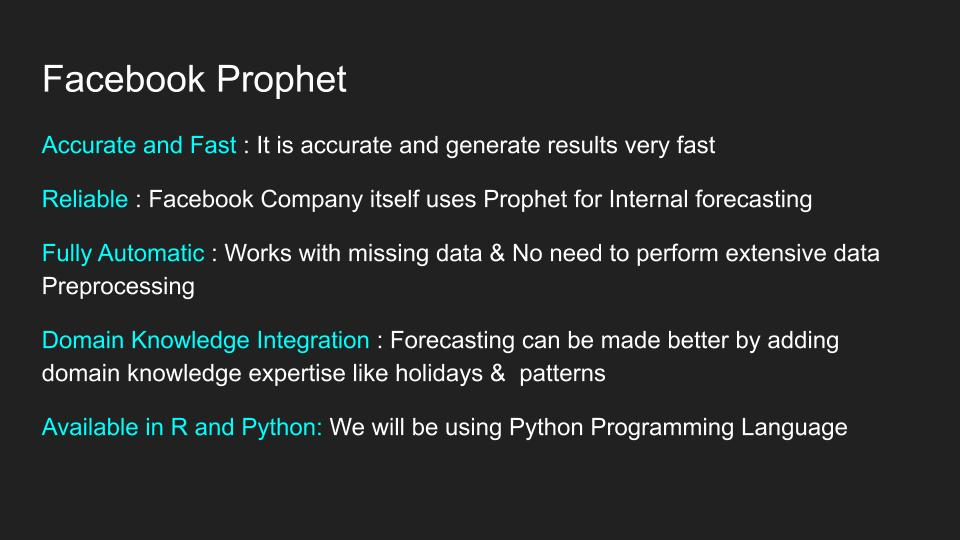

fbprophet is based on decomposable model such as:
    
- Trend
- Seasonality
- Holiday

Stocks do not have seasonal influence. But they do have trends.

## Data Preparation

In [44]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,382.583344,400.356659,378.679993,399.926666,399.926666,103931400
1,2022-01-04,396.516663,402.666656,374.350006,383.196655,383.196655,100248300
2,2022-01-05,382.216675,390.113342,360.336670,362.706665,362.706665,80119800
3,2022-01-06,359.000000,362.666656,340.166656,354.899994,354.899994,90336600
4,2022-01-07,360.123322,360.309998,336.666656,342.320007,342.320007,84164700
...,...,...,...,...,...,...,...
255,2023-01-09,118.959999,123.519997,117.110001,119.769997,119.769997,190284000
256,2023-01-10,121.070000,122.760002,114.919998,118.849998,118.849998,167642500
257,2023-01-11,122.089996,125.949997,120.510002,123.220001,123.220001,183810800
258,2023-01-12,122.559998,124.129997,117.000000,123.559998,123.559998,169400900


In [45]:
columns=['Date','Close']
ndf=pd.DataFrame(df,columns=columns)
ndf

,Date,Close
0,2022-01-03,399.926666
1,2022-01-04,383.196655
2,2022-01-05,362.706665
3,2022-01-06,354.899994
4,2022-01-07,342.320007
...,...,...
255,2023-01-09,119.769997
256,2023-01-10,118.849998
257,2023-01-11,123.220001
258,2023-01-12,123.559998


In [46]:
prophet_df=ndf.rename(columns={'Date':'ds', 'Close':'y'})
prophet_df

,ds,y
0,2022-01-03,399.926666
1,2022-01-04,383.196655
2,2022-01-05,362.706665
3,2022-01-06,354.899994
4,2022-01-07,342.320007
...,...,...
255,2023-01-09,119.769997
256,2023-01-10,118.849998
257,2023-01-11,123.220001
258,2023-01-12,123.559998


## Creating Facebook Prophet Model

In [47]:
m=Prophet()
m.fit(prophet_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/ssteni/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Initial log joint probability = -4.11139


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      90       516.373     0.0030047       110.801   3.304e-05       0.001      139  LS failed, Hessian reset 
      99       516.526   0.000382598       80.6139      0.5713      0.5713      149   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     152       516.885   0.000289567       63.1793   3.558e-06       0.001      262  LS failed, Hessian reset 
     177       516.983   0.000267823       79.4374   3.619e-06       0.001      326  LS failed, Hessian reset 
     199       516.997   4.01615e-06       60.5774      0.2142           1      353   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     222           517   2.53999e-05       76.9794   3.713e-07       0.001      420  LS failed, Hessian reset 
     264       517.002   2.42373e-08       78.3828      0.2211      0.9543      478   
Optimization termin

## Forecasting

In [55]:
future=m.make_future_dataframe(periods=90)
forecast=m.predict(future)

/Users/ssteni/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/ssteni/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [56]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-01-03,346.697002,303.370419,377.315947,346.697002,346.697002,-7.264736,-7.264736,-7.264736,-7.264736,-7.264736,-7.264736,0.0,0.0,0.0,339.432266
1,2022-01-04,346.231096,299.724900,371.163052,346.231096,346.231096,-10.631572,-10.631572,-10.631572,-10.631572,-10.631572,-10.631572,0.0,0.0,0.0,335.599524
2,2022-01-05,345.765190,299.244780,370.413446,345.765190,345.765190,-9.904448,-9.904448,-9.904448,-9.904448,-9.904448,-9.904448,0.0,0.0,0.0,335.860742
3,2022-01-06,345.299284,297.194205,369.171452,345.299284,345.299284,-11.569834,-11.569834,-11.569834,-11.569834,-11.569834,-11.569834,0.0,0.0,0.0,333.729451
4,2022-01-07,344.833378,294.897005,369.731715,344.833378,344.833378,-13.232098,-13.232098,-13.232098,-13.232098,-13.232098,-13.232098,0.0,0.0,0.0,331.601281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,2023-04-09,17.531016,4.058733,85.451785,0.276630,35.123614,26.301343,26.301343,26.301343,26.301343,26.301343,26.301343,0.0,0.0,0.0,43.832359
346,2023-04-10,16.237579,-32.331865,50.545242,-1.317722,34.311358,-7.264736,-7.264736,-7.264736,-7.264736,-7.264736,-7.264736,0.0,0.0,0.0,8.972843
347,2023-04-11,14.944142,-35.803590,44.063964,-2.847190,33.262156,-10.631572,-10.631572,-10.631572,-10.631572,-10.631572,-10.631572,0.0,0.0,0.0,4.312570
348,2023-04-12,13.650705,-34.884707,48.287991,-4.423826,32.209877,-9.904448,-9.904448,-9.904448,-9.904448,-9.904448,-9.904448,0.0,0.0,0.0,3.746257


In [57]:
px.line(forecast, x='ds', y='yhat')

In [51]:
# Compare with the actual

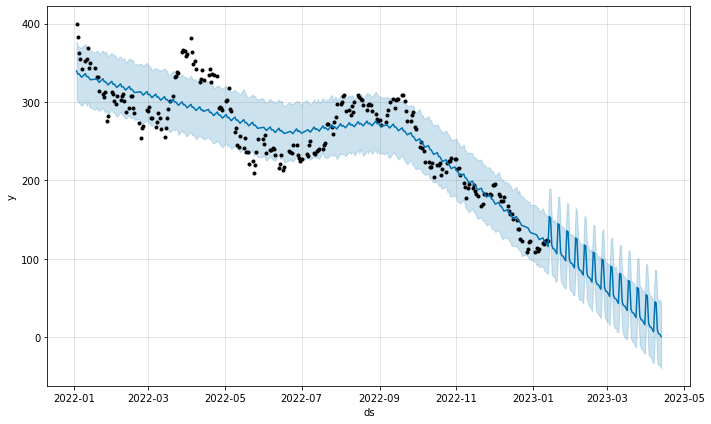

In [58]:
figure=m.plot(forecast,xlabel='ds',ylabel='y')

/Users/ssteni/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



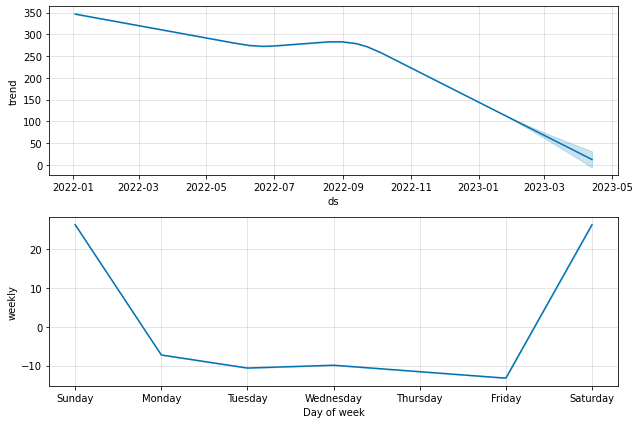

In [59]:
figure2=m.plot_components(forecast)

## Downloading the Forecast data

In [54]:
forecast.to_csv('TSLA_2022_Forecast.csv')